In [1]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

Using TensorFlow backend.
/Users/Aswin_Shriram_T/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Aswin_Shriram_T/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Aswin_Shriram_T/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Aswin_S

In [2]:
ENV_NAME = 'LunarLander-v2'

In [3]:
# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

/Users/Aswin_Shriram_T/opt/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
import os

In [5]:
path = os.path.join( os.getcwd(), '..' )
model_save_path = path + '/Model Archive/'
results_save_path = path + '/Results/'

In [6]:
print(path)
print(model_save_path)
print(results_save_path)

/Users/Aswin_Shriram_T/Documents/Northeastern University/Semester 1/Foundations of AI CS5100/Project/Project_Files/FAI Project/DQN_LLD/Code/..
/Users/Aswin_Shriram_T/Documents/Northeastern University/Semester 1/Foundations of AI CS5100/Project/Project_Files/FAI Project/DQN_LLD/Code/../Model Archive/
/Users/Aswin_Shriram_T/Documents/Northeastern University/Semester 1/Foundations of AI CS5100/Project/Project_Files/FAI Project/DQN_LLD/Code/../Results/


In [27]:
# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                144       
_________________________________________________________________
activation_9 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
activation_10 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2112      
_________________________________________________________________
activation_11 (Activation)   (None, 64)               

In [28]:
# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=1000000, window_length=1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae', 'mse'])

In [9]:
from rl import callbacks

In [10]:
# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
dqn.fit(env, nb_steps=50000, visualize=False, callbacks=[callbacks.FileLogger(results_save_path+'dqn_{}_weights.txt'.format(ENV_NAME))], verbose=3)

Training for 50000 steps ...

    83/50000: episode: 1, duration: 0.422s, episode steps: 83, steps per second: 197, episode reward: -269.687, mean reward: -3.249 [-100.000, 4.951], mean action: 1.253 [0.000, 3.000], mean observation: 0.167 [-1.655, 1.936], loss: --, mae: --, mse: --, mean_q: --
   161/50000: episode: 2, duration: 2.779s, episode steps: 78, steps per second: 28, episode reward: -86.873, mean reward: -1.114 [-100.000, 12.028], mean action: 1.436 [0.000, 3.000], mean observation: 0.067 [-1.361, 1.401], loss: 46.569791, mae: 1.010010, mse: 23.460904, mean_q: -0.118550
   263/50000: episode: 3, duration: 0.984s, episode steps: 102, steps per second: 104, episode reward: -313.119, mean reward: -3.070 [-100.000, 1.004], mean action: 1.794 [0.000, 3.000], mean observation: 0.074 [-1.360, 1.598], loss: 60.151443, mae: 2.106776, mse: 33.564346, mean_q: -1.127148
   533/50000: episode: 4, duration: 2.628s, episode steps: 270, steps per second: 103, episode reward: -762.850, mean 

In [12]:
# After training is done, we save the final weights.
# dqn.save_weights('dqn_{}_weights_temp.h5'.format(ENV_NAME), overwrite=True)

In [ ]:
# model_json = dqn.model.to_json()
# with open("dqn_model1.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# dqn.save_weights("model1.h5")
# print("Saved model to disk")

In [ ]:
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")

In [29]:
dqn.load_weights(model_save_path + 'dqn_{}_weights_old.h5'.format(ENV_NAME))

In [ ]:
# Finally, evaluate our algorithm for 5 episodes.
dqn.test(env, nb_episodes=10, visualize=False)

In [30]:
# Finally, evaluate our algorithm for 5 episodes.
dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...
Episode 1: reward: -26.311, steps: 1000
Episode 2: reward: 214.086, steps: 285
Episode 3: reward: 250.042, steps: 277
Episode 4: reward: 197.228, steps: 338
Episode 5: reward: 220.833, steps: 480


In [31]:
env.close()

In [32]:
from gym.wrappers.monitoring.video_recorder import VideoRecorder

In [33]:
def video_saver(filename, agent=dqn, env=env, num_epi=5, path_save = results_save_path+'Videos/'):
    rec = VideoRecorder(env, path = path_save+filename, enabled=True)
    rec.capture_frame()
    for i_episode in range(num_epi):
        rec.capture_frame()
        observation = env.reset()
        for t in range(1000):
            env.render()
            #print(observation)
            #action = agent.actor.predict(observation.reshape(1,1,env.observation_space.shape[0]))
            action = agent.model.predict(observation.reshape(1,1,env.observation_space.shape[0]))
            #print(action)
            observation, reward, done, info = env.step(np.argmax(action))
            rec.capture_frame()
            if done:
                print("Episode finished after {} timesteps".format(t+1))
                print("Reward at the end of episode {} :".format(i_episode+1), reward)
                break
    rec.close()
    env.close()

In [38]:
video_saver('dqn_{}_results_test_new1.mp4'.format(ENV_NAME))

Episode finished after 267 timesteps
Reward at the end of episode 1 : 100
Episode finished after 711 timesteps
Reward at the end of episode 2 : 100
Episode finished after 395 timesteps
Reward at the end of episode 3 : 100
Episode finished after 499 timesteps
Reward at the end of episode 4 : 100
Episode finished after 331 timesteps
Reward at the end of episode 5 : 100


In [34]:
# Finally, evaluate our algorithm for 5 episodes.
history = dqn.test(env, nb_episodes=100, verbose = 2, visualize=False)

Testing for 100 episodes ...
Episode 1: reward: -77.499, steps: 1000
Episode 2: reward: -29.128, steps: 1000
Episode 3: reward: -209.661, steps: 288
Episode 4: reward: -210.116, steps: 698
Episode 5: reward: 249.388, steps: 198
Episode 6: reward: 256.431, steps: 260
Episode 7: reward: -102.632, steps: 489
Episode 8: reward: -69.067, steps: 1000
Episode 9: reward: 196.353, steps: 331
Episode 10: reward: 185.813, steps: 537
Episode 11: reward: -69.328, steps: 1000
Episode 12: reward: 159.897, steps: 521
Episode 13: reward: 188.554, steps: 474
Episode 14: reward: -129.386, steps: 975
Episode 15: reward: 225.988, steps: 345
Episode 16: reward: -56.223, steps: 1000
Episode 17: reward: -37.393, steps: 1000
Episode 18: reward: -52.983, steps: 1000
Episode 19: reward: 109.166, steps: 799
Episode 20: reward: 209.535, steps: 360
Episode 21: reward: 116.898, steps: 758
Episode 22: reward: 159.083, steps: 752
Episode 23: reward: 221.436, steps: 396
Episode 24: reward: 154.092, steps: 722
Episode 2

In [7]:
import pandas as pd

In [36]:
# pd.DataFrame(history.history).to_csv(results_save_path + 'ddpg_{}_results_test.csv'.format(ENV_NAME))

## Analysis of Results

In [8]:
import json

In [9]:
import matplotlib.pyplot as plt

In [39]:
model_results = json.load(open(results_save_path+'dqn_LunarLander-v2_train_old.txt'))

In [40]:
type(model_results)

dict

In [41]:
model_results_df = pd.DataFrame(model_results)
analyze_df = model_results_df.copy()
analyze_df['episode'] +=1
analyze_df['avg_reward_per_episode-step'] = analyze_df['episode_reward']/analyze_df['nb_episode_steps']

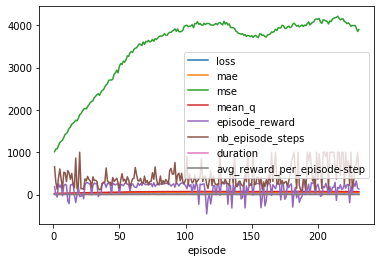

In [42]:
analyze_df.set_index(['episode']).drop(['nb_steps'], axis=1).plot()

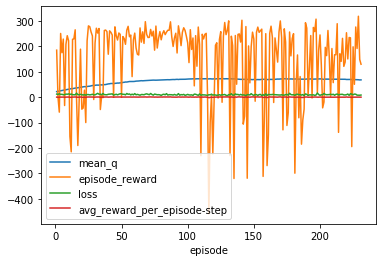

In [43]:
analyze_df.set_index(['episode'])[['mean_q', 'episode_reward', 'loss', 'avg_reward_per_episode-step']].plot()

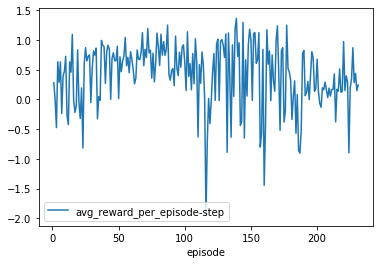

In [44]:
analyze_df.set_index(['episode'])[['avg_reward_per_episode-step']].plot()

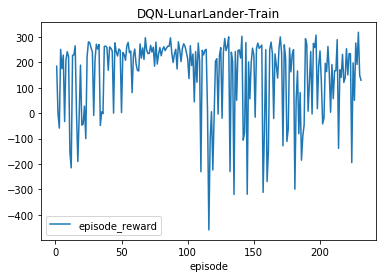

In [52]:
analyze_df.set_index(['episode'])[['episode_reward']].plot()
plt.title('DQN-LunarLander-Train')
plt.savefig(results_save_path+'train_rewards.png', dpi=400, bbox_inches='tight')

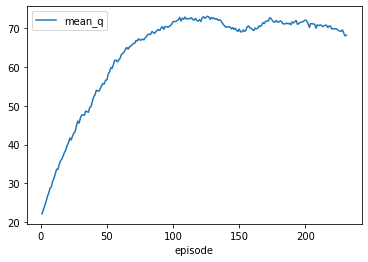

In [46]:
analyze_df.set_index(['episode'])[['mean_q']].plot()

In [11]:
test_df = pd.read_csv(results_save_path + 'dqn_{}_results_test.csv'.format(ENV_NAME))
test_df['Unnamed: 0'] +=1
test_df.columns = ['episode', 'episode_reward', 'nb_steps']

In [12]:
test_df.columns

Index(['episode', 'episode_reward', 'nb_steps'], dtype='object')

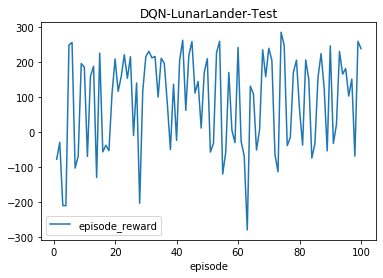

In [13]:
test_df.set_index(['episode'])[['episode_reward']].plot()
plt.title('DQN-LunarLander-Test')
plt.savefig(results_save_path+'test_rewards.png', dpi=400, bbox_inches='tight')